Data is filthy.

# Extraction, first look

In [3]:
library("dplyr")

choco <- read.csv("choco_wprice.csv", stringsAsFactors = FALSE)

summary(choco)

   Company          Specific.Bean.Origin      REF        Review.Date  
 Length:1852        Length:1852          Min.   :   5   Min.   :2006  
 Class :character   Class :character     1st Qu.: 600   1st Qu.:2010  
 Mode  :character   Mode  :character     Median :1099   Median :2013  
                                         Mean   :1065   Mean   :2012  
                                         3rd Qu.:1546   3rd Qu.:2015  
                                         Max.   :2008   Max.   :2017  
                                                                      
 Cocoa.Percent   Company.Location       Rating       Bean.Type        
 Min.   : 42.0   Length:1852        Min.   :1.000   Length:1852       
 1st Qu.: 70.0   Class :character   1st Qu.:3.000   Class :character  
 Median : 70.0   Mode  :character   Median :3.250   Mode  :character  
 Mean   : 71.7                      Mean   :3.265                     
 3rd Qu.: 75.0                      3rd Qu.:3.500                     
 Max. 

# Transformation

 • Deleting missing values

In [3]:
# Let's see how many missing values per attribute we have.

missing_values_count <- sapply(
  choco, function(x) sum(x == "" | is.na(x))
) # That is, the sum of every blank or N/A value

print(missing_values_count)

             Company Specific.Bean.Origin                  REF 
                   0                    0                    0 
         Review.Date        Cocoa.Percent     Company.Location 
                   0                    0                    0 
              Rating            Bean.Type    Broad.Bean.Origin 
                 265                  938                   74 
           Bar.Price 
                 556 


In [4]:
# Now, let's see the proportion of these values.

# Rule of thumb, an attribute with > 50, maybe 60% missing data is a candidate for deletion in a static dataset

missing_values_proportion <- sapply(
  choco, function(x) sum(x == "" | is.na(x)) / nrow(choco)
)

print(missing_values_proportion)

             Company Specific.Bean.Origin                  REF 
           0.0000000            0.0000000            0.0000000 
         Review.Date        Cocoa.Percent     Company.Location 
           0.0000000            0.0000000            0.0000000 
              Rating            Bean.Type    Broad.Bean.Origin 
           0.1430886            0.5064795            0.0399568 
           Bar.Price 
           0.3002160 


In [5]:
# For the sake of practice, we'll delete attributes missing 50% or more values

atts_to_delete <- which(missing_values_proportion >= 0.5)
choco <- choco[, -atts_to_delete]

 • Replacing missing values

In [11]:
# Are there any attributes whose values can be estimated?

# We could replace with 0, replace with mean, or replace with median.

# For Bar.Price, the mean is the most proper replacement:

choco$Bar.Price[is.na(choco$Bar.Price)] <- mean(choco$Bar.Price, na.rm = TRUE)

head(choco)

Company  Specific.Bean.Origin REF  Review.Date Cocoa.Percent Company.Location
1 A. Morin Agua Grande          1876 2016        63            France          
2 A. Morin Kpime                1676 2015        70            France          
3 A. Morin Panama               1011 2013        70            France          
4 A. Morin Madagascar           1011 2013        70            France          
5 A. Morin Brazil               1011 2013        70            France          
6 A. Morin Equateur             1011 2013        70            France          
  Rating Broad.Bean.Origin Bar.Price
1 3.75   Sao Tome          2.535807 
2   NA   Togo              5.997822 
3   NA   Panama            5.455234 
4 3.00   Madagascar        7.014562 
5 3.25   Brazil            5.889096 
6 3.75   Ecuador           2.836863

 • Replacing missing values stratigraphically

In [34]:
sum(is.na(choco$Rating)) # Missing ratings

# Estimating missing ratings according to median by company:

per_comp = aggregate(choco$Rating, by=list(choco$Company), na.rm=TRUE, median)
colnames(per_comp) = c("Company", "MRating")

# Replacing a few values manually

choco$Rating[is.na(choco$Rating) & choco$Company == "Vicuna"] <- per_comp$Rating[per_comp$Company == "Vicuna"]
choco$Rating[is.na(choco$Rating) & choco$Company == "Zokoko"] <- per_comp$Rating[per_comp$Company == "Zokoko"]
choco$Rating[is.na(choco$Rating) & choco$Company == "Videri"] <- per_comp$Rating[per_comp$Company == "Videri"]


choco %>% filter(Company == "Zokoko") %>% select(Rating)


[1] 265

Rating
1 3.75  
2 3.25  
3 3.50  
4 3.50  
5 3.75

# Checking out outliers

Boxplots show values more than three stdevs away from the median as outliers.

Could these really be of extremely high/low quality or simply anomalies? Judgment call!

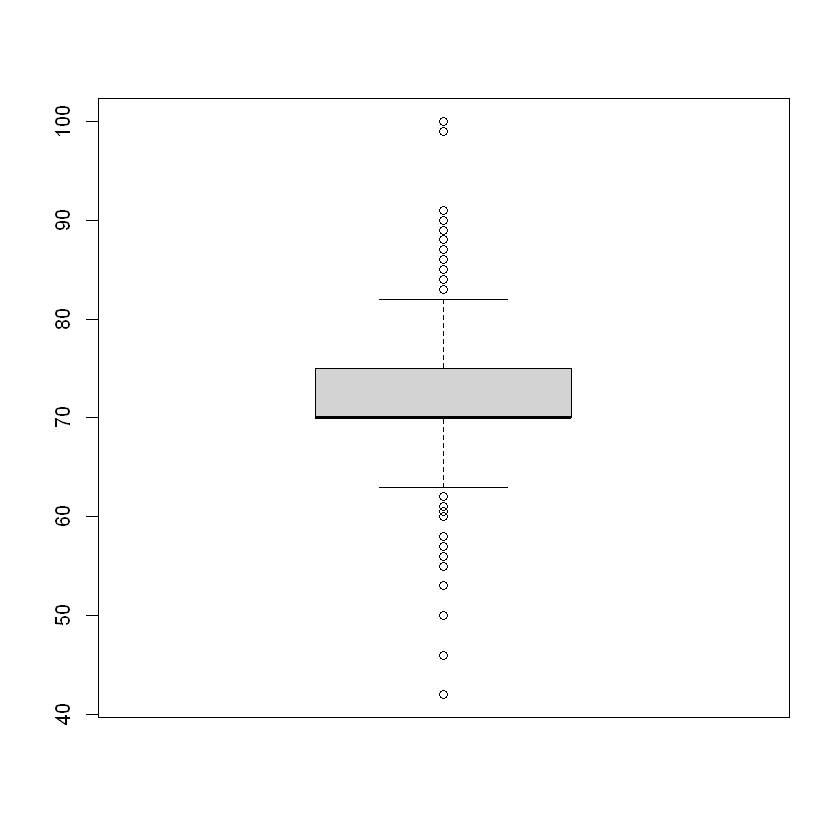

In [35]:
boxplot(choco$Cocoa.Percent)